In [229]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Importing data into python- Data was collected from FRED and concatenated to create one excel file.

In [230]:
df = pd.read_excel('Data.xlsx', sheet_name= 'Sheet 1 ', header = 0)
df

,observation_date,ASPUS,MSPUS,EVACANTUSQ176N,ETOTALUSQ176N,GDP,UNRATE,INTDSRUSM193N,MORTGAGE15US,MORTGAGE30US,UMCSENT,MSACSR,TLRESCONS,POPTHM,PERMIT,CSUSHPISA
0,2003-01-01,233100,186000,14908,120792,11174.129,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.320667
1,2003-04-01,241000,191800,15244,121233,11312.766,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.755667
2,2003-07-01,248100,191900,15614,121682,11566.669,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.013000
3,2003-10-01,256000,198800,15654,122159,11772.234,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.834667
4,2004-01-01,262900,212700,15895,122632,11923.447,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.298667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,527500,449300,15312,143514,25248.476,3.6,NaN,4.45,5.27,57.9,8.8,973237,333320,1735,303.115333
78,2022-07-01,547800,468000,15340,143923,25723.941,3.6,NaN,4.88,5.62,56.1,9.5,919244,333800,1611,301.729667
79,2022-10-01,552600,479500,14593,144332,26137.992,3.6,NaN,5.96,6.66,58.8,9.2,875009,334283,1455,298.146000
80,2023-01-01,505300,429000,15102,144740,26529.774,3.5,NaN,5.56,6.37,64.6,8.2,859979,334641,1424,297.256333


## Data Cleaning and Pre processing.

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  82 non-null     object 
 1   ASPUS             82 non-null     int64  
 2   MSPUS             82 non-null     int64  
 3   EVACANTUSQ176N    82 non-null     int64  
 4   ETOTALUSQ176N     82 non-null     int64  
 5   GDP               82 non-null     float64
 6   UNRATE            82 non-null     float64
 7   INTDSRUSM193N     74 non-null     float64
 8   MORTGAGE15US      82 non-null     float64
 9   MORTGAGE30US      82 non-null     float64
 10  UMCSENT           82 non-null     float64
 11  MSACSR            82 non-null     float64
 12  TLRESCONS         82 non-null     int64  
 13  POPTHM            82 non-null     int64  
 14  PERMIT            82 non-null     int64  
 15  CSUSHPISA         82 non-null     float64
dtypes: float64(8), int64(7), object(1)
memory usag

### Renaming columns to a readable format.

In [232]:
df.rename(
    columns = {
        'observation_date' : 'Date',
        'ASPUS' : 'Average Sales Price of Houses Sold',
        'MSPUS' : 'Median Sales Price of Houses Sold',
        'EVACANTUSQ176N' : 'Housing Inventory Estimate(Vacant)',
        'ETOTALUSQ176N' : 'Housing Inventory Estimate(Total)',
        'UNRATE' : 'Unemployment Rate',
        'INTDSRUSM193N' : 'Interest and Discount Rates',
        'MORTGAGE15US' : '15 Year Fixed Mortgage Rate',
        'MORTGAGE30US' : '30 Year Fixed Mortgage Rate',
        'UMCSENT' : 'Consumer Sentiment',
        'MSACSR' : 'Monthly Supply of New Houses',
        'TLRESCONS' : 'Total Construction Spending',
        'POPTHM' : 'Population',
        'PERMIT' : 'New Authorized Privately Owned Houses',       
        'CSUSHPISA' : 'Case-Shiller Home Price Index'
    },
    inplace = True
)

In [233]:
df.head()

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
0,2003-01-01,233100,186000,14908,120792,11174.129,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.320667
1,2003-04-01,241000,191800,15244,121233,11312.766,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.755667
2,2003-07-01,248100,191900,15614,121682,11566.669,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.013000
3,2003-10-01,256000,198800,15654,122159,11772.234,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.834667
4,2004-01-01,262900,212700,15895,122632,11923.447,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.298667


### Converting date into datetime format from string format.

In [234]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
0,2003-01-01,233100,186000,14908,120792,11174.129,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.320667
1,2003-04-01,241000,191800,15244,121233,11312.766,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.755667
2,2003-07-01,248100,191900,15614,121682,11566.669,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.013000
3,2003-10-01,256000,198800,15654,122159,11772.234,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.834667
4,2004-01-01,262900,212700,15895,122632,11923.447,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.298667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,527500,449300,15312,143514,25248.476,3.6,NaN,4.45,5.27,57.9,8.8,973237,333320,1735,303.115333
78,2022-07-01,547800,468000,15340,143923,25723.941,3.6,NaN,4.88,5.62,56.1,9.5,919244,333800,1611,301.729667
79,2022-10-01,552600,479500,14593,144332,26137.992,3.6,NaN,5.96,6.66,58.8,9.2,875009,334283,1455,298.146000
80,2023-01-01,505300,429000,15102,144740,26529.774,3.5,NaN,5.56,6.37,64.6,8.2,859979,334641,1424,297.256333


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   82 non-null     datetime64[ns]
 1   Average Sales Price of Houses Sold     82 non-null     int64         
 2   Median Sales Price of Houses Sold      82 non-null     int64         
 3   Housing Inventory Estimate(Vacant)     82 non-null     int64         
 4   Housing Inventory Estimate(Total)      82 non-null     int64         
 5   GDP                                    82 non-null     float64       
 6   Unemployment Rate                      82 non-null     float64       
 7   Interest and Discount Rates            74 non-null     float64       
 8   15 Year Fixed Mortgage Rate            82 non-null     float64       
 9   30 Year Fixed Mortgage Rate            82 non-null     float64     

In [236]:
df.isnull().sum()

Date                                     0
Average Sales Price of Houses Sold       0
Median Sales Price of Houses Sold        0
Housing Inventory Estimate(Vacant)       0
Housing Inventory Estimate(Total)        0
GDP                                      0
Unemployment Rate                        0
Interest and Discount Rates              8
15 Year Fixed Mortgage Rate              0
30 Year Fixed Mortgage Rate              0
Consumer Sentiment                       0
Monthly Supply of New Houses             0
Total Construction Spending              0
Population                               0
New Authorized Privately Owned Houses    0
Case-Shiller Home Price Index            0
dtype: int64

In [237]:
df.tail(10)

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
72,2021-01-01,418600,369800,15602,141589,22313.850,6.2,0.25,2.28,2.88,80.2,4.4,759608,331989,1766,242.287000
73,2021-04-01,440600,382600,15657,141927,23046.934,5.9,0.25,2.31,3.00,85.6,5.4,789077,332149,1679,253.658000
74,2021-07-01,473000,411200,15208,142288,23550.420,5.1,NaN,2.17,2.87,74.8,6.1,822764,332480,1697,266.828000
75,2021-10-01,497300,423600,15009,142697,24349.121,4.2,NaN,2.34,3.08,69.9,6.1,864116,332786,1817,277.493667
76,2022-01-01,514100,433100,15184,143105,24740.480,3.8,NaN,3.04,3.82,63.1,6.3,941061,332978,1864,290.924667
77,2022-04-01,527500,449300,15312,143514,25248.476,3.6,NaN,4.45,5.27,57.9,8.8,973237,333320,1735,303.115333
78,2022-07-01,547800,468000,15340,143923,25723.941,3.6,NaN,4.88,5.62,56.1,9.5,919244,333800,1611,301.729667
79,2022-10-01,552600,479500,14593,144332,26137.992,3.6,NaN,5.96,6.66,58.8,9.2,875009,334283,1455,298.146000
80,2023-01-01,505300,429000,15102,144740,26529.774,3.5,NaN,5.56,6.37,64.6,8.2,859979,334641,1424,297.256333
81,2023-04-01,495100,416100,15049,145149,26798.605,3.6,NaN,5.87,6.51,62.4,7.5,858475,335019,1451,302.502000


### Interest and Discount rates have NaN which needs to be treated. Since the rest of the data is important for analysis, deleting rows is not advisable. Using SimpleImputer method, we can take the average of the data to fill NaN values.

In [238]:
df['Interest and Discount Rates'].nunique()

31

In [239]:
df['Interest and Discount Rates'].isna().sum()

8

In [240]:
imputer = SimpleImputer(strategy='mean')
df['Interest and Discount Rates'] = imputer.fit_transform(df[['Interest and Discount Rates']])

In [241]:
df['Interest and Discount Rates'].isna().sum()

0

In [242]:
df.tail(10)

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
72,2021-01-01,418600,369800,15602,141589,22313.850,6.2,0.250000,2.28,2.88,80.2,4.4,759608,331989,1766,242.287000
73,2021-04-01,440600,382600,15657,141927,23046.934,5.9,0.250000,2.31,3.00,85.6,5.4,789077,332149,1679,253.658000
74,2021-07-01,473000,411200,15208,142288,23550.420,5.1,1.961351,2.17,2.87,74.8,6.1,822764,332480,1697,266.828000
75,2021-10-01,497300,423600,15009,142697,24349.121,4.2,1.961351,2.34,3.08,69.9,6.1,864116,332786,1817,277.493667
76,2022-01-01,514100,433100,15184,143105,24740.480,3.8,1.961351,3.04,3.82,63.1,6.3,941061,332978,1864,290.924667
77,2022-04-01,527500,449300,15312,143514,25248.476,3.6,1.961351,4.45,5.27,57.9,8.8,973237,333320,1735,303.115333
78,2022-07-01,547800,468000,15340,143923,25723.941,3.6,1.961351,4.88,5.62,56.1,9.5,919244,333800,1611,301.729667
79,2022-10-01,552600,479500,14593,144332,26137.992,3.6,1.961351,5.96,6.66,58.8,9.2,875009,334283,1455,298.146000
80,2023-01-01,505300,429000,15102,144740,26529.774,3.5,1.961351,5.56,6.37,64.6,8.2,859979,334641,1424,297.256333
81,2023-04-01,495100,416100,15049,145149,26798.605,3.6,1.961351,5.87,6.51,62.4,7.5,858475,335019,1451,302.502000


### Rounding off float values upto 2 decimals for ease of undersanding.

In [243]:
df['GDP'] = round(df['GDP'], 2)
df['Interest and Discount Rates'] = round(df['Interest and Discount Rates'], 2)
df['Case-Shiller Home Price Index'] = round(df['Case-Shiller Home Price Index'], 2)

In [244]:
df.describe()

,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,339434.146341,282656.097561,17074.134146,133586.695122,17415.122561,5.946341,1.961220,4.107439,4.726829,81.913415,6.181707,500731.158537,315306.109756,1312.475610,183.567561
std,75195.431335,69112.688616,1390.719813,6186.237451,3971.001469,2.038772,1.645108,1.215613,1.125386,12.519908,1.914024,186961.362749,13954.219918,474.357375,44.891473
min,233100.000000,186000.000000,13876.000000,120792.000000,11174.130000,3.500000,0.250000,2.170000,2.760000,56.100000,3.400000,246953.000000,289609.000000,539.000000,129.320000
25%,279175.000000,228275.000000,15838.000000,130051.750000,14477.690000,4.500000,0.750000,3.122500,3.825000,73.300000,4.825000,359316.250000,303660.500000,997.250000,148.217500
50%,321250.000000,261600.000000,17263.000000,133321.000000,16664.300000,5.350000,1.665000,3.830000,4.445000,82.900000,5.600000,499146.500000,316464.000000,1285.500000,173.775000
75%,376400.000000,319975.000000,18208.500000,138132.250000,20090.305000,7.125000,2.310000,5.280000,5.822500,92.950000,7.500000,589578.000000,328417.250000,1692.500000,200.867500
max,552600.000000,479500.000000,19137.000000,145149.000000,26798.600000,13.000000,6.250000,6.230000,6.660000,98.900000,11.400000,973237.000000,335019.000000,2228.000000,303.120000


In [245]:
df.shape

(82, 16)

### Dropping duplicates.

In [246]:
df.drop_duplicates(inplace = True)

In [247]:
df.shape

(82, 16)

## EDA

In [248]:
data = df.corr()
data

/var/folders/mn/styx4vqn4gx_1w9g8y2k3rn00000gn/T/ipykernel_73491/4251409926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
Average Sales Price of Houses Sold,1.000000,0.994619,-0.527319,0.865299,0.945044,-0.517966,-0.079327,-0.285006,-0.268545,-0.118735,0.084315,0.803234,0.822103,0.244398,0.954813
Median Sales Price of Houses Sold,0.994619,1.000000,-0.516316,0.889034,0.959804,-0.482240,-0.131233,-0.346600,-0.330837,-0.113262,0.050257,0.783473,0.853129,0.217691,0.942899
Housing Inventory Estimate(Vacant),-0.527319,-0.516316,1.000000,-0.192682,-0.366176,0.424465,-0.215952,-0.050710,-0.049973,-0.177991,0.394428,-0.828202,-0.178291,-0.822218,-0.618193
Housing Inventory Estimate(Total),0.865299,0.889034,-0.192682,1.000000,0.970508,-0.208995,-0.371909,-0.559986,-0.557454,-0.190873,0.148989,0.468802,0.980680,-0.183971,0.776697
GDP,0.945044,0.959804,-0.366176,0.970508,1.000000,-0.374482,-0.268749,-0.460534,-0.448434,-0.147961,0.091388,0.630767,0.945257,0.011652,0.876380
Unemployment Rate,-0.517966,-0.482240,0.424465,-0.208995,-0.374482,1.000000,-0.529508,-0.219775,-0.224071,-0.427387,0.032553,-0.658608,-0.212414,-0.597588,-0.530782
Interest and Discount Rates,-0.079327,-0.131233,-0.215952,-0.371909,-0.268749,-0.529508,1.000000,0.707073,0.666580,0.272357,0.131683,0.327710,-0.435326,0.547367,0.093147
15 Year Fixed Mortgage Rate,-0.285006,-0.346600,-0.050710,-0.559986,-0.460534,-0.219775,0.707073,1.000000,0.992422,-0.130256,0.439709,0.079259,-0.665812,0.290396,-0.093028
30 Year Fixed Mortgage Rate,-0.268545,-0.330837,-0.049973,-0.557454,-0.448434,-0.224071,0.666580,0.992422,1.000000,-0.147177,0.417900,0.075893,-0.658538,0.283971,-0.093439
Consumer Sentiment,-0.118735,-0.113262,-0.177991,-0.190873,-0.147961,-0.427387,0.272357,-0.130256,-0.147177,1.000000,-0.614450,0.050149,-0.052737,0.412780,-0.183127


Text(0.5, 1.0, 'Correlation between factors')

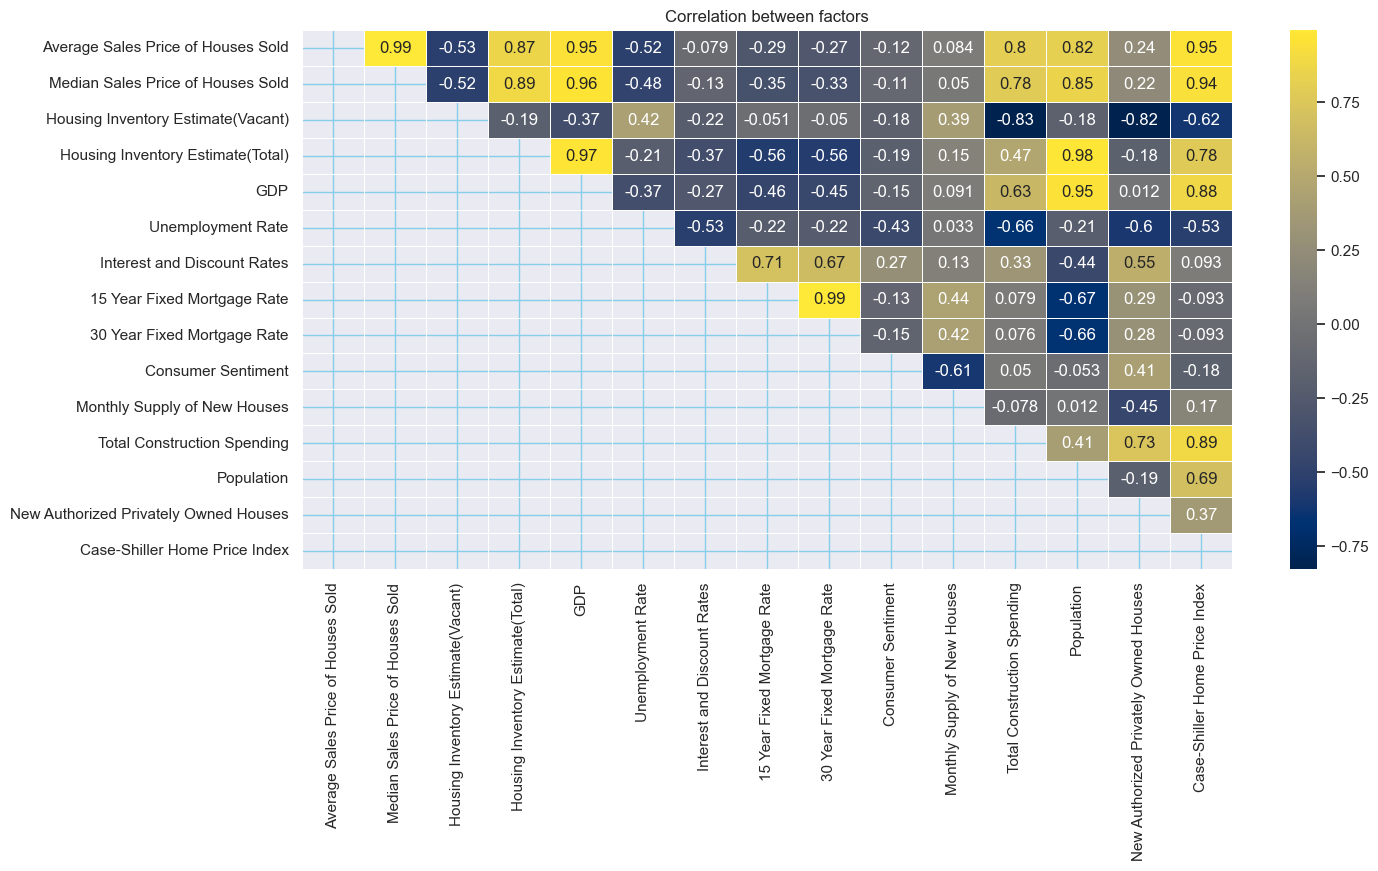

In [249]:
sns.set_theme()
f, ax = plt.subplots(figsize=(15, 7))
mask = np.zeros_like(data)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data, annot=True, linewidths=.5, ax=ax, mask = mask, cmap='cividis')
plt.grid(color = 'skyblue')
plt.title('Correlation between factors')

In [250]:
correlation_with_price_index = df.corr()['Case-Shiller Home Price Index']
table = pd.DataFrame(correlation_with_price_index).reset_index()
table.columns = ['Features', 'Correlation with Home Price Index']
table

/var/folders/mn/styx4vqn4gx_1w9g8y2k3rn00000gn/T/ipykernel_73491/4271714676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_price_index = df.corr()['Case-Shiller Home Price Index']


,Features,Correlation with Home Price Index
0,Average Sales Price of Houses Sold,0.954813
1,Median Sales Price of Houses Sold,0.942899
2,Housing Inventory Estimate(Vacant),-0.618193
3,Housing Inventory Estimate(Total),0.776697
4,GDP,0.876380
5,Unemployment Rate,-0.530782
6,Interest and Discount Rates,0.093147
7,15 Year Fixed Mortgage Rate,-0.093028
8,30 Year Fixed Mortgage Rate,-0.093439
9,Consumer Sentiment,-0.183127


Correlation between features and dependent variable(Case-Shiller Home Price Index):

"Average Sales Price of Houses Sold" and "Median Sales Price of Houses Sold" have high positive correlations with the Home Price Index, suggesting that higher average and median sales prices are associated with higher home prices.

"Housing Inventory Estimate (Vacant)" has a negative correlation, indicating that an increase in vacant housing inventory tends to be associated with lower home prices.

"GDP" has a strong positive correlation, implying that as the Gross Domestic Product increases, home prices tend to rise.

"Unemployment Rate" has a negative correlation, meaning that higher unemployment rates are associated with lower home prices.

"Interest and Discount Rates," has a weak positive relationship with the Home Price Index. In other words, as interest and discount rates increase slightly, home prices tend to see a modest increase as well, but the relationship is not very strong.

"30 Year Fixed Mortgage Rate," and "15 Year Fixed Mortgage Rate" have correlations close to 0, suggesting that they may not strongly influence home prices in a linear manner.

"Consumer Sentiment" shows a weak negative correlation with the Home Price Index. When consumer sentiment decreases slightly (indicating lower confidence), home prices tend to experience a slight decrease, but again, the relationship is not strong.

"Monthly Supply of New Houses" shows a weak positive relationship with the Home Price Index. When the supply of new houses increases slightly, home prices tend to see a modest increase, but the relationship is not very strong.

"Total Construction Spending" has a very strong positive correlation with the home price index which indicates that as construction spending increases, home prices tend to see a substantial increase.

"Population" also hase a strong positive correlation indicating an increase in the home prices as population increases.

"New Authorized Privately Owned Houses" has a moderate positive relationship with the Home Price Index. When more new houses are authorized, home prices tend to experience a moderate increase.

In [251]:
df

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index
0,2003-01-01,233100,186000,14908,120792,11174.13,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.32
1,2003-04-01,241000,191800,15244,121233,11312.77,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.76
2,2003-07-01,248100,191900,15614,121682,11566.67,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.01
3,2003-10-01,256000,198800,15654,122159,11772.23,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.83
4,2004-01-01,262900,212700,15895,122632,11923.45,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,527500,449300,15312,143514,25248.48,3.6,1.96,4.45,5.27,57.9,8.8,973237,333320,1735,303.12
78,2022-07-01,547800,468000,15340,143923,25723.94,3.6,1.96,4.88,5.62,56.1,9.5,919244,333800,1611,301.73
79,2022-10-01,552600,479500,14593,144332,26137.99,3.6,1.96,5.96,6.66,58.8,9.2,875009,334283,1455,298.15
80,2023-01-01,505300,429000,15102,144740,26529.77,3.5,1.96,5.56,6.37,64.6,8.2,859979,334641,1424,297.26


In [252]:
df['Year'] = df['Date'].dt.year
df

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index,Year
0,2003-01-01,233100,186000,14908,120792,11174.13,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.32,2003
1,2003-04-01,241000,191800,15244,121233,11312.77,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.76,2003
2,2003-07-01,248100,191900,15614,121682,11566.67,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.01,2003
3,2003-10-01,256000,198800,15654,122159,11772.23,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.83,2003
4,2004-01-01,262900,212700,15895,122632,11923.45,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.30,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,527500,449300,15312,143514,25248.48,3.6,1.96,4.45,5.27,57.9,8.8,973237,333320,1735,303.12,2022
78,2022-07-01,547800,468000,15340,143923,25723.94,3.6,1.96,4.88,5.62,56.1,9.5,919244,333800,1611,301.73,2022
79,2022-10-01,552600,479500,14593,144332,26137.99,3.6,1.96,5.96,6.66,58.8,9.2,875009,334283,1455,298.15,2022
80,2023-01-01,505300,429000,15102,144740,26529.77,3.5,1.96,5.56,6.37,64.6,8.2,859979,334641,1424,297.26,2023


### Grouping data based on year for efficient data visulaixations

In [253]:
grouped_data= df.groupby('Year').agg(
    {
        'Average Sales Price of Houses Sold' : 'mean',
        'Median Sales Price of Houses Sold' : 'mean',
        'Housing Inventory Estimate(Vacant)' : 'sum',
        'Housing Inventory Estimate(Total)' : 'sum',
        'GDP' : 'mean',
        'Unemployment Rate' : 'mean',
        'Interest and Discount Rates' : 'mean',
        '15 Year Fixed Mortgage Rate' : 'mean',
        '30 Year Fixed Mortgage Rate' : 'mean',
        'Consumer Sentiment' : 'mean',
        'Monthly Supply of New Houses' : 'mean',
        'Total Construction Spending' : 'sum',
        'Population' : 'mean',
        'New Authorized Privately Owned Houses' : 'sum',
        'Case-Shiller Home Price Index' : 'mean'
    }
).reset_index()

In [254]:
grouped_data['Year'] = pd.to_datetime(grouped_data['Year'], format = '%Y')
grouped_data['Year'] = grouped_data['Year'].dt.strftime('%Y')

In [255]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   21 non-null     object 
 1   Average Sales Price of Houses Sold     21 non-null     float64
 2   Median Sales Price of Houses Sold      21 non-null     float64
 3   Housing Inventory Estimate(Vacant)     21 non-null     int64  
 4   Housing Inventory Estimate(Total)      21 non-null     int64  
 5   GDP                                    21 non-null     float64
 6   Unemployment Rate                      21 non-null     float64
 7   Interest and Discount Rates            21 non-null     float64
 8   15 Year Fixed Mortgage Rate            21 non-null     float64
 9   30 Year Fixed Mortgage Rate            21 non-null     float64
 10  Consumer Sentiment                     21 non-null     float64
 11  Monthly 

### Scaling is necessary to bring data to one scale so that visulizations can be interpreted correctly.

In [256]:
scaler = MinMaxScaler()

In [257]:
grouped_data.columns

Index(['Year', 'Average Sales Price of Houses Sold',
       'Median Sales Price of Houses Sold',
       'Housing Inventory Estimate(Vacant)',
       'Housing Inventory Estimate(Total)', 'GDP', 'Unemployment Rate',
       'Interest and Discount Rates', '15 Year Fixed Mortgage Rate',
       '30 Year Fixed Mortgage Rate', 'Consumer Sentiment',
       'Monthly Supply of New Houses', 'Total Construction Spending',
       'Population', 'New Authorized Privately Owned Houses',
       'Case-Shiller Home Price Index'],
      dtype='object')

In [258]:
columns = [
    'Average Sales Price of Houses Sold',
    'Housing Inventory Estimate(Vacant)', 
    'GDP',
    'Interest and Discount Rates', 
    '15 Year Fixed Mortgage Rate',
    'Consumer Sentiment', 
    'Monthly Supply of New Houses',
    'Unemployment Rate', 
    '30 Year Fixed Mortgage Rate',
    'Total Construction Spending', 
    'Median Sales Price of Houses Sold',
    'Housing Inventory Estimate(Total)',
    'Population',
    'New Authorized Privately Owned Houses',
    'Case-Shiller Home Price Index'
]

In [259]:
grouped_data[columns] = pd.DataFrame(scaler.fit_transform(grouped_data[columns]))

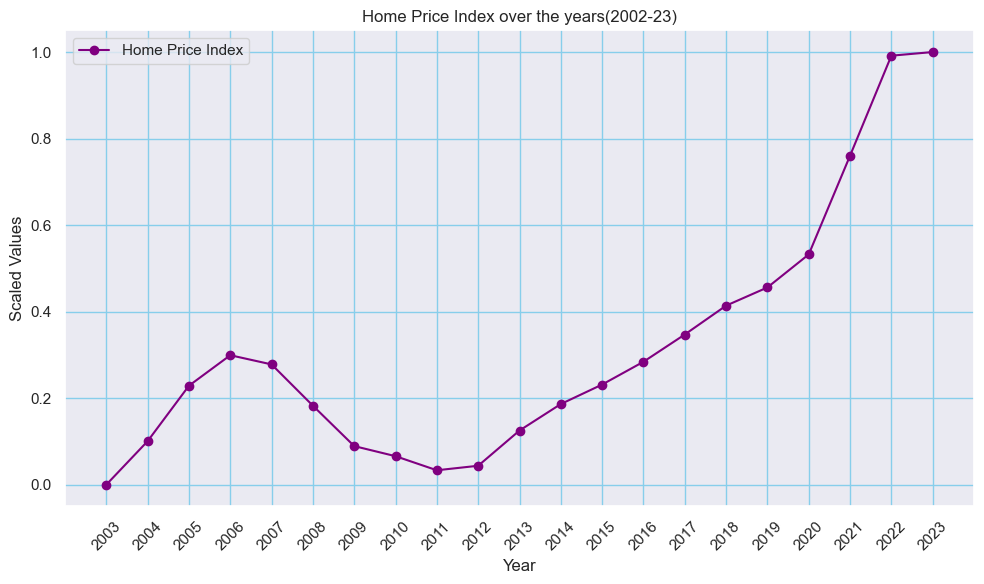

In [296]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Home Price Index over the years(2002-23)')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The home price index has seen a rising trend over the years except for the period of 2007 to 2011 which was the period of the Global Financial Crisis particularly tagetting the U.S. real estate market leading to increased unemployment, higher mortgages, reduced purchasing power. The situation improved after 2011 and home price index has seen a constant increase since then.

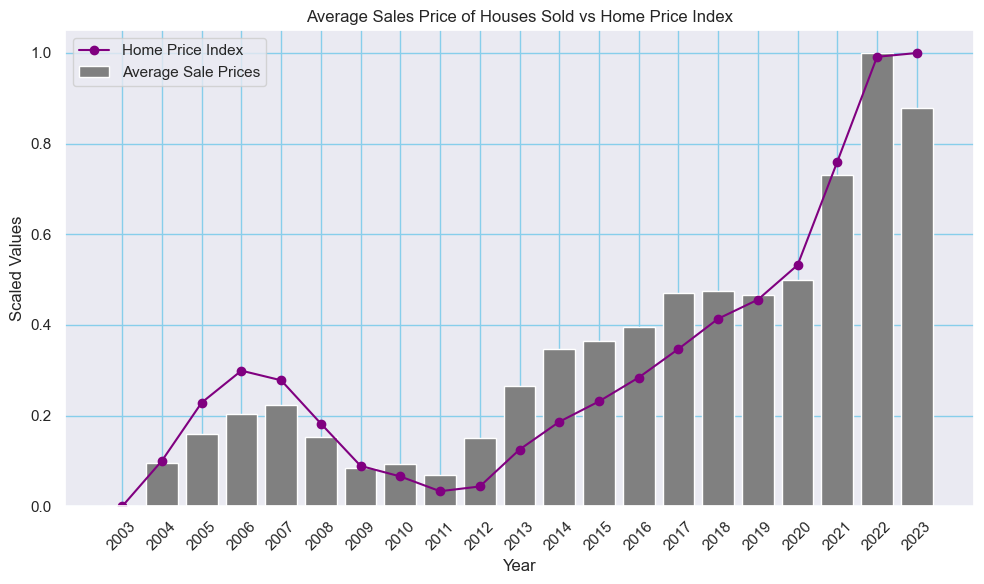

In [260]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Average Sales Price of Houses Sold'], color = 'grey', label = 'Average Sale Prices')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Average Sales Price of Houses Sold vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

Average Sales Prices has a strong positive correlation with the home price index. In a competitive real estate market with high demand and limited supply, sellers can command higher prices for their homes. This leads to an increase in both the average sales price and the overall home price index.

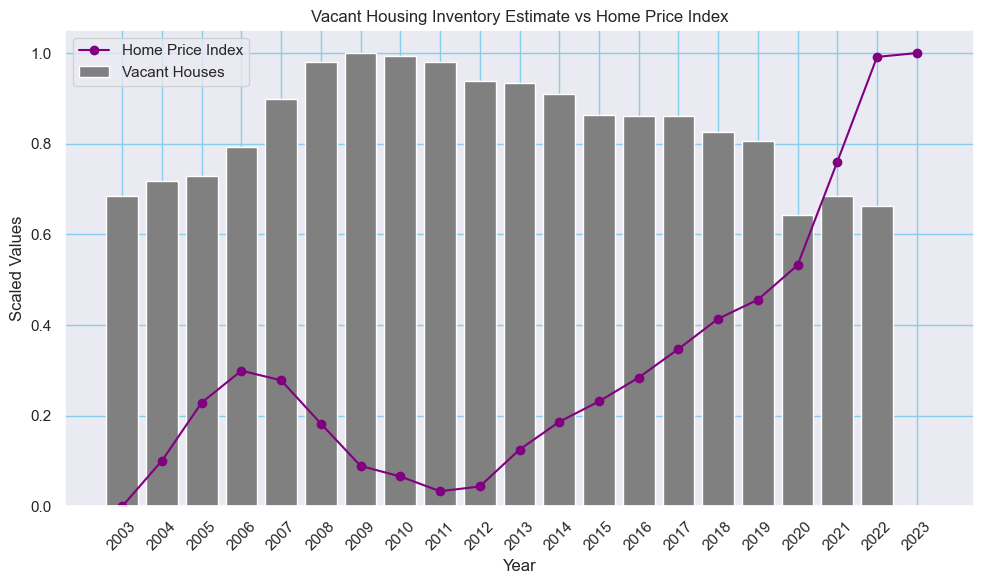

In [261]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Housing Inventory Estimate(Vacant)'], color = 'grey', label = 'Vacant Houses')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Vacant Housing Inventory Estimate vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The Vacant Housing Inventory Estimate has a moderate negative correlation with the home price index. This means that as the number of vacant houses increases with no change in the demand, there is a downward pressure on the prices leading to decrease in prices. This can be due to various reasons such as Economic downturn, location of the property, etc. Similarly, a downward trend in the vacant houses means an increase in the demand, leading to increase in prices(properties that are high in demand)

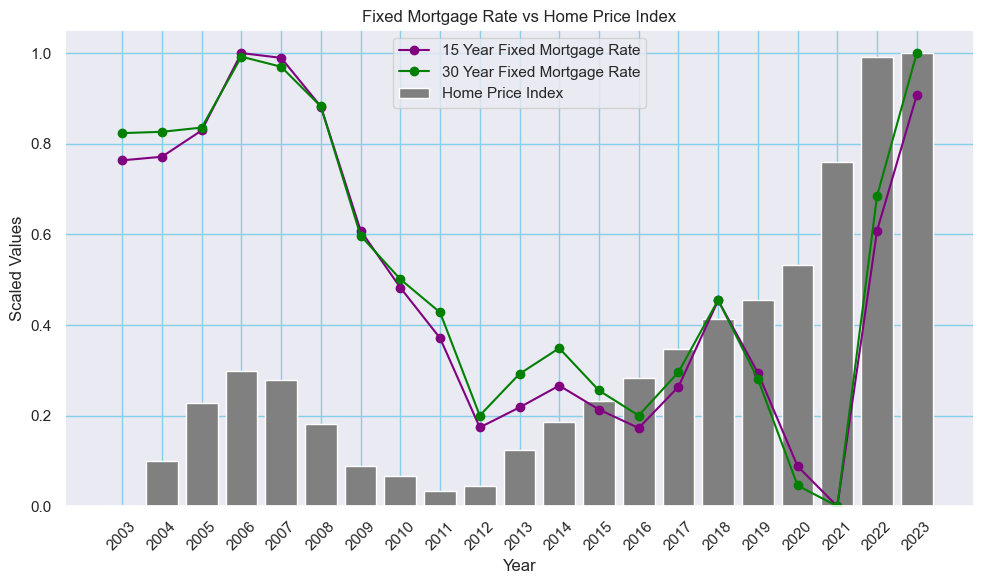

In [262]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['15 Year Fixed Mortgage Rate'], color = 'purple', marker = 'o', label = '15 Year Fixed Mortgage Rate')
plt.plot(grouped_data['Year'], grouped_data['30 Year Fixed Mortgage Rate'], color = 'green', marker = 'o', label = '30 Year Fixed Mortgage Rate')
plt.bar(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], color = 'grey', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Fixed Mortgage Rate vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The 15-year and 30-year fixed mortgage interest rate shows the average interest rates for fixed period of times (15 years and 30 years respectively). mortgage rates have a weak negative correlation meaning as the rates decreases, it becomes cheaper for consumers to buy houses leading to increase in demand and as the rates increase, buying becomes costlier leading to decrease in demand.

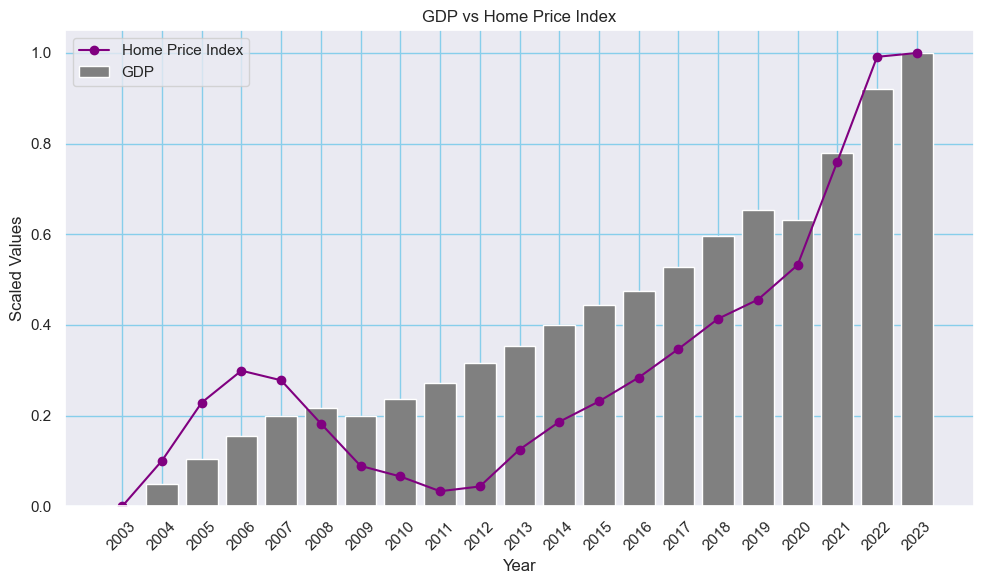

In [263]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['GDP'], color = 'grey', label = 'GDP')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('GDP vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

 When GDP grows, indicating a healthy economy with job creation and rising incomes, it often boosts consumer confidence and leads to increased demand for housing. Higher demand can put upward pressure on home prices. Additionally, lower interest rates, sometimes associated with economic stimulus measures during GDP growth, can make mortgages more affordable, further stimulating housing demand and impacting home prices. However,many other factors also influence home prices, including local market conditions, housing supply, government policies, and demographic trends. 


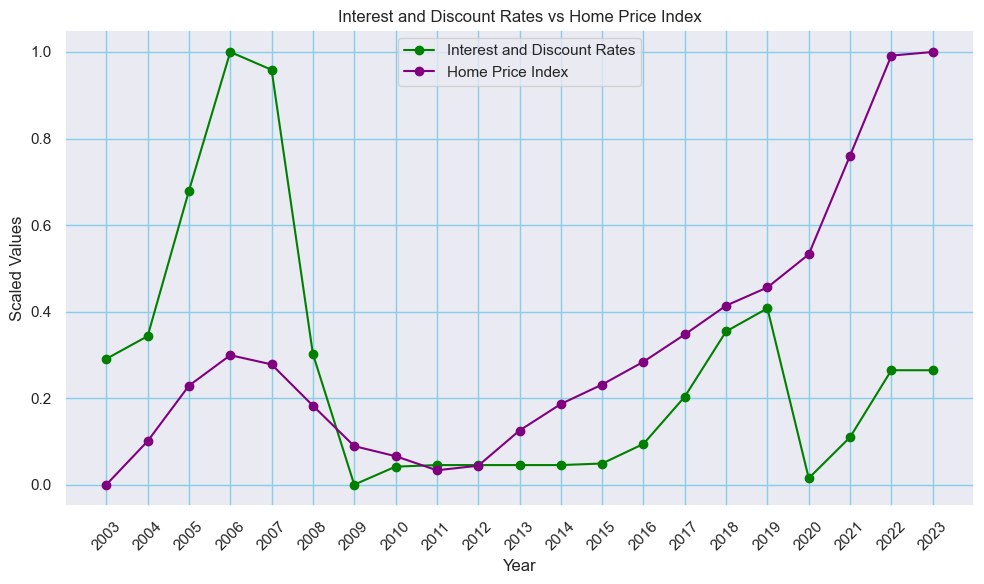

In [264]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['Interest and Discount Rates'],marker = 'o', color = 'green', label = 'Interest and Discount Rates')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Interest and Discount Rates vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The discount rate is the rate at which financial instituions borrow money from the Federal Reserve. An increase in the rate would reault in an increase in the mortgage rates thus increasing home prices whereas, a decrease in discount rate leads causes homes to become more affordable due to lower borrowing costs, which can increase demand. Lower rates can also attract real estate investors and boost consumer confidence, further stimulating housing demand. 

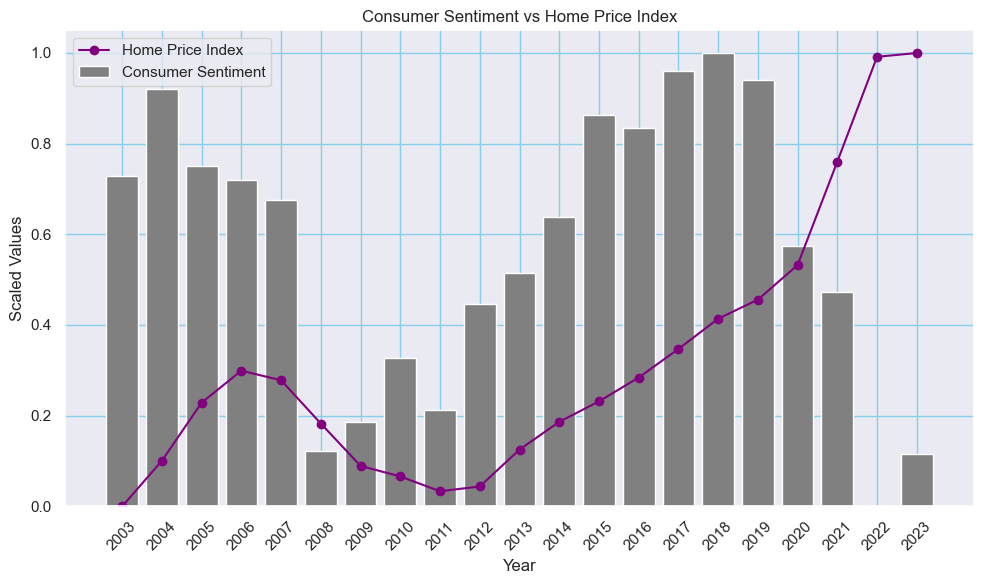

In [265]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Consumer Sentiment'], color = 'grey', label = 'Consumer Sentiment')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Consumer Sentiment vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

Consumer sentiment refers to the confidence and optimism that consumers have about the economy and their personal financial situations. When consumer sentiment is high, people generally feel more positive about their economic prospects and financial stability. This optimism can lead to increased confidence in making significant financial decisions, such as buying a home. This increased demand can contribute to upward pressure on home prices. 

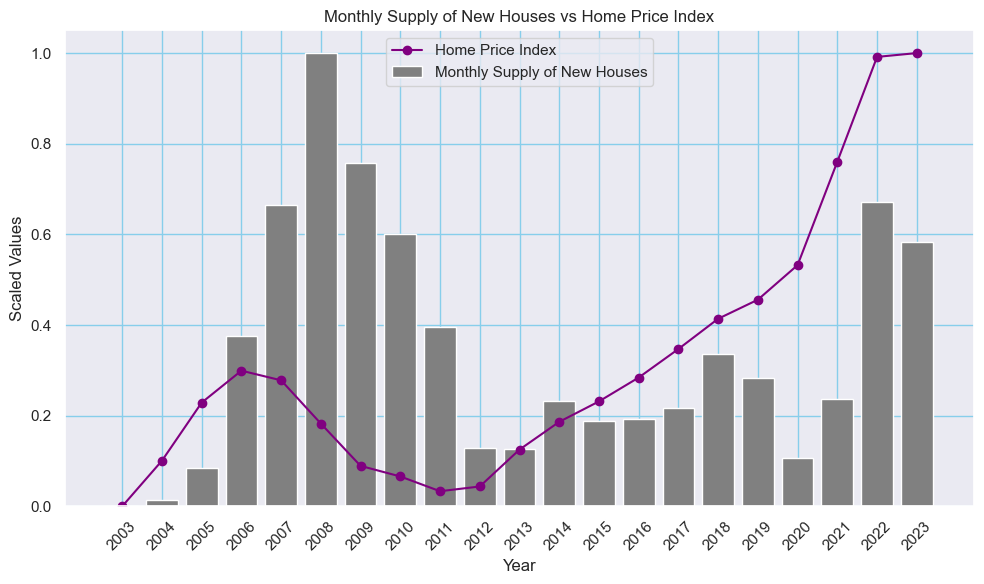

In [266]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Monthly Supply of New Houses'], color = 'grey', label = 'Monthly Supply of New Houses')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Monthly Supply of New Houses vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The monthly supply of new houses has a weak positive relationship with the home price index. The data indicates the supply of newly constructed homes available in the market each month. This supply is typically measured in the number of months it would take to sell the current inventory of new homes at the current sales pace. An increasing supply leads to potential oversupply pushing down the prices and a decreasing supply leads to tightening home conditions leading to increase in prices.

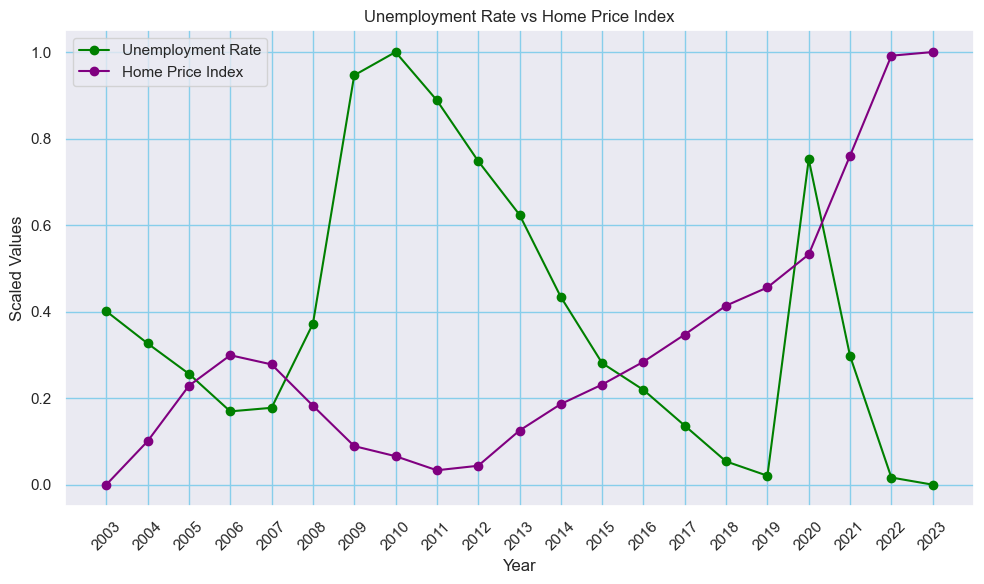

In [267]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['Unemployment Rate'],marker = 'o', color = 'green', label = 'Unemployment Rate')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Unemployment Rate vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

Unemployment rate The unemployment rate is a critical labor market indicator that measures the proportion of people in the labor force who are without a job and are actively looking for work. There is a negative relation between the unemployment rate and the House price index. Thus, an increase in unemployment rate leads to decrease in capacity of the consumer to buy houses leading to decrease in demand but increase in supply thus pushing down prices and vice versa.

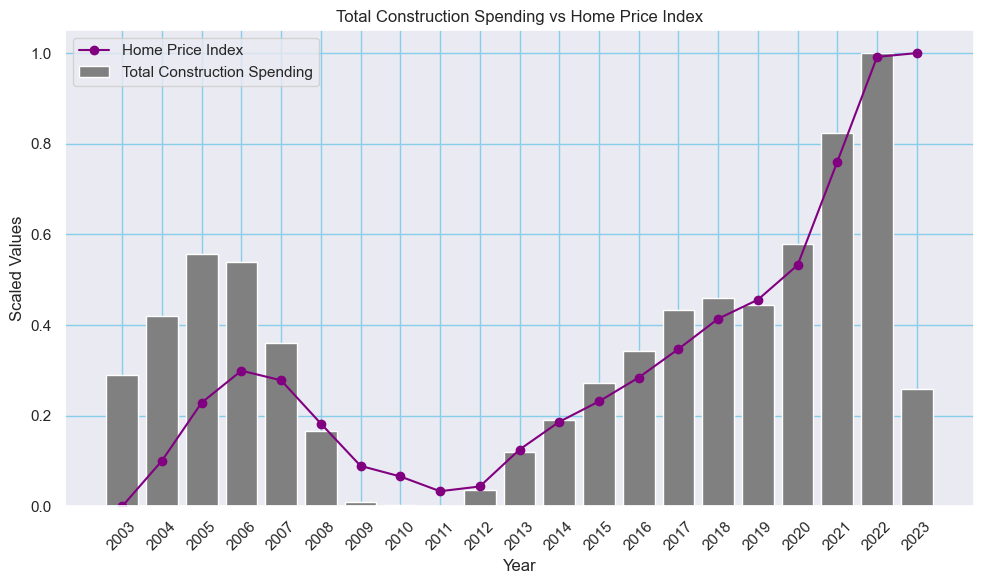

In [268]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Total Construction Spending'], color = 'grey', label = 'Total Construction Spending')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Total Construction Spending vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

Home price index can be seen increasing as the total construction spending increases. This is true as when total construction spending increases it tends to push price upward leading to increase in home price index. It has seen an upward trend as as the GDP and population increase, the standard of living increases leading to increased demand of houses and a further need to develop more houses. this leads to increased construction spending putting an upward pressure on the home price index.

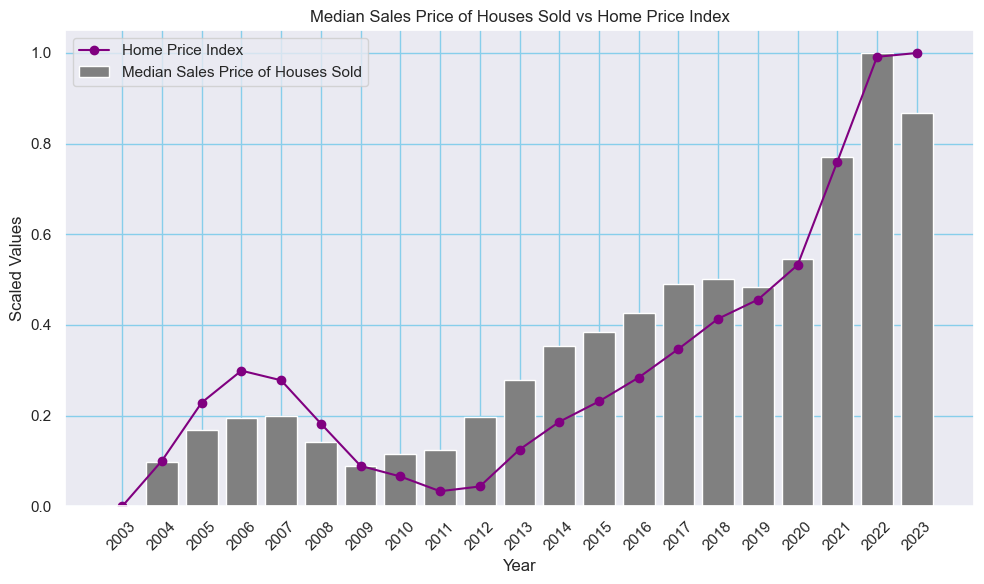

In [269]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Median Sales Price of Houses Sold'], color = 'grey', label = 'Median Sales Price of Houses Sold')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Median Sales Price of Houses Sold vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The median sales price is the middle value in a list of all house sale prices, with half of the sales prices falling below this value and half above it. It is a measure of the typical or midpoint price in the housing market. Rising prices may indicate increased demand or reduced supply, while falling prices may suggest oversupply or decreased demand.

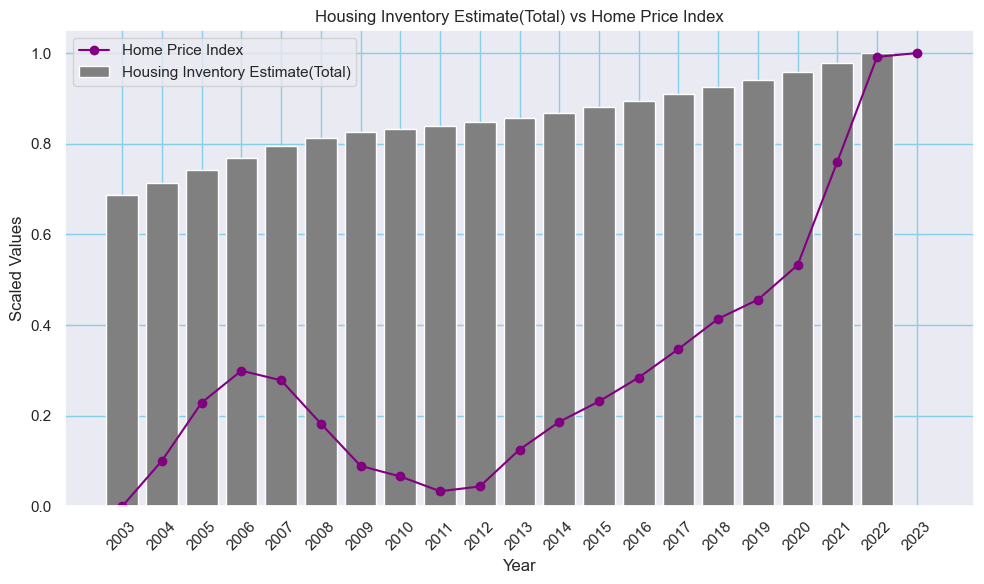

In [301]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Housing Inventory Estimate(Total)'], color = 'grey', label = 'Housing Inventory Estimate(Total)')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Housing Inventory Estimate(Total) vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

This data provides information about the estimated total number of housing units in the United States, measured in thousands of units. An increase in the number of housing units can be due to increase demand (shortage of supply) leading to increased house prices and a decrease could be potentially due to decrease in demand (supply > demand) leading to fall in prces.

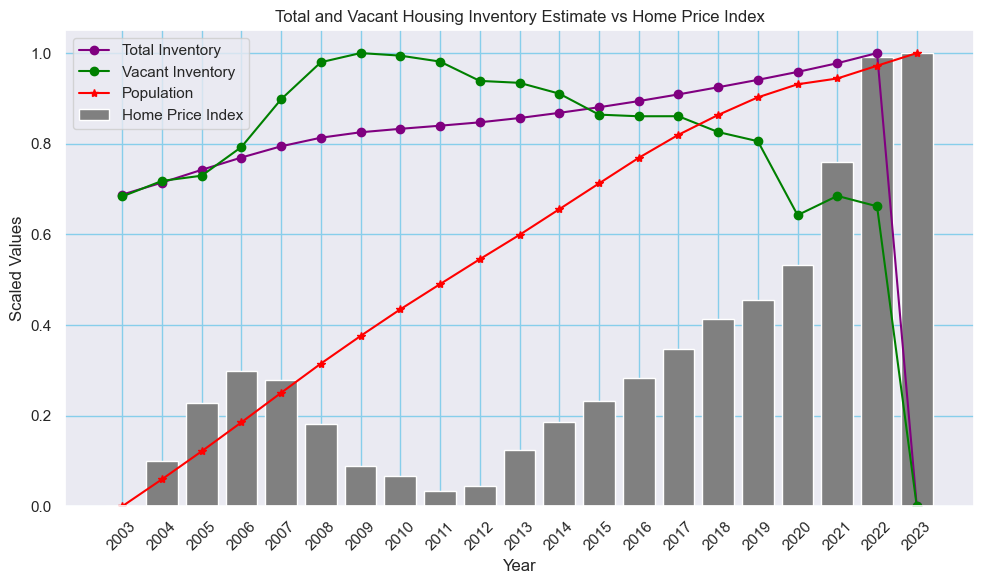

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['Housing Inventory Estimate(Total)'], marker = 'o', color = 'purple', label = 'Total Inventory')
plt.plot(grouped_data['Year'], grouped_data['Housing Inventory Estimate(Vacant)'], marker = 'o',color = 'green', label = 'Vacant Inventory')
plt.plot(grouped_data['Year'], grouped_data['Population'], color = 'red', marker = '*', label = 'Population')
plt.bar(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], color = 'grey', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Total and Vacant Housing Inventory Estimate vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The total housing inventory is closely linked to population growth. An increasing population may require additional housing units, potentially impacting the demand for homes and home prices. Additionally, rising vacancy rates may suggest an oversupply of housing units pushing down prices, while decreasing rates may indicate a tighter, more competitive market. Thus, even as population increases, the home price index depends on the buying patter of consumers which is directly related to vacancy rates and total inventory needs.



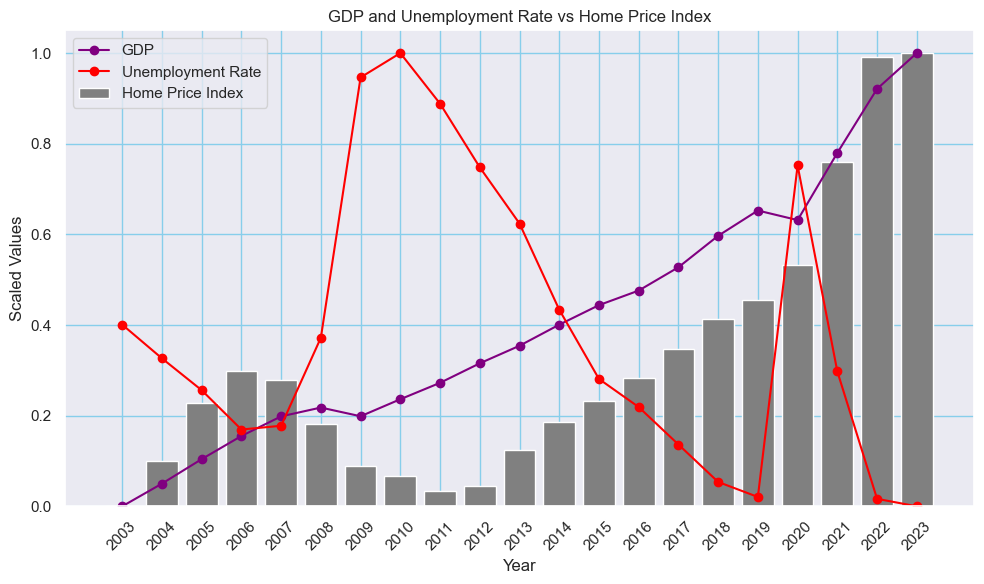

In [272]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['GDP'], color = 'purple', marker = 'o', label = 'GDP')
plt.plot(grouped_data['Year'], grouped_data['Unemployment Rate'], color = 'red', marker = 'o', label = 'Unemployment Rate')
plt.bar(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], color = 'grey', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('GDP and Unemployment Rate vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

GDP and Home Price Index have a positive relation whereas unemployment rate vs Home price index have a negative relation. The unemployment rate is closely linked to economic conditions. High unemployment rates can be associated with economic downturns(financial crisis of 2008), which may impact the ability of individuals and families to buy homes. A rising unemployment rate can also be associated with an increase in mortgage delinquencies and foreclosures, which can have broader implications for the housing market. GDP growth is often associated with changes in employment rates. A strong job market can drive demand for housing, as people with stable employment are more likely to buy homes.


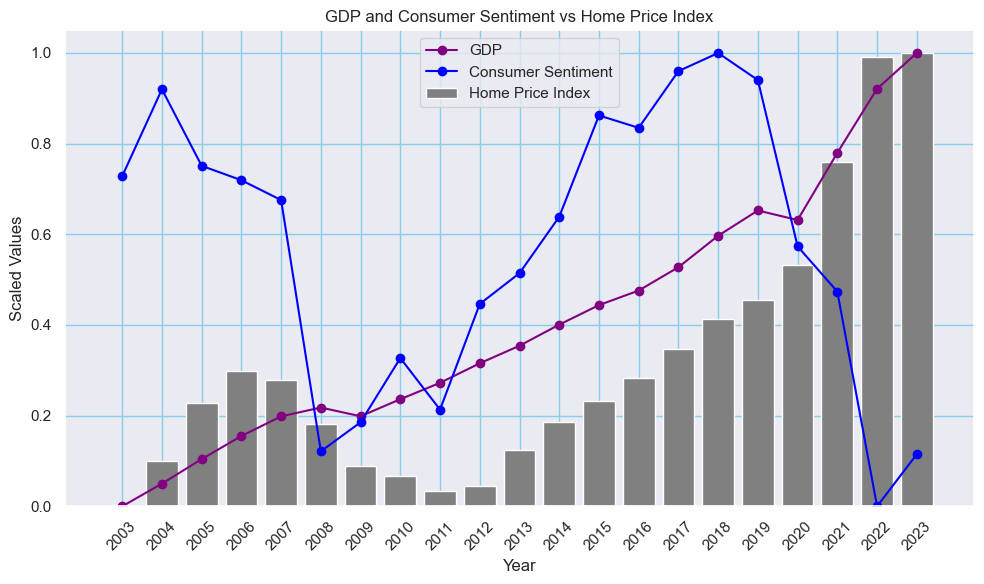

In [302]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['GDP'], color = 'purple', marker = 'o', label = 'GDP')
plt.plot(grouped_data['Year'], grouped_data['Consumer Sentiment'], color = 'blue', marker = 'o', label = 'Consumer Sentiment')
plt.bar(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], color = 'grey', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('GDP and Consumer Sentiment vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

The Consumer Sentiment Index is a measure of consumer confidence and attitudes toward the economy. It reflects consumers' perceptions of their current financial situation, as well as their expectations for future economic conditions. High consumer confidence can encourage homebuying, as people may feel more secure about their financial prospects, potentially affecting housing demand and prices. Consumer sentiment has a week negative impact on the house price index and it can be seen fluctuating over the years not affecting the house price index substantially.


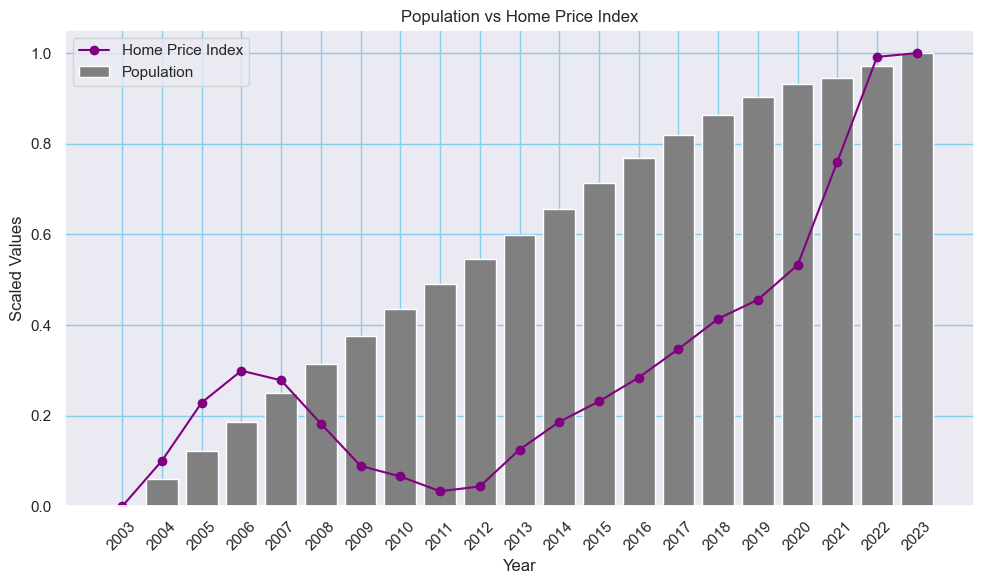

In [274]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['Population'], color = 'grey', label = 'Population')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Population vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

Population has a strong positive correlation with the home price index. As the population increases, the demand for houses tend to increase putting an upward pressure on the prices. Population has seen a steady growth and so has the house price index except for the period of 2008-11due to the financial crisis of 2008.

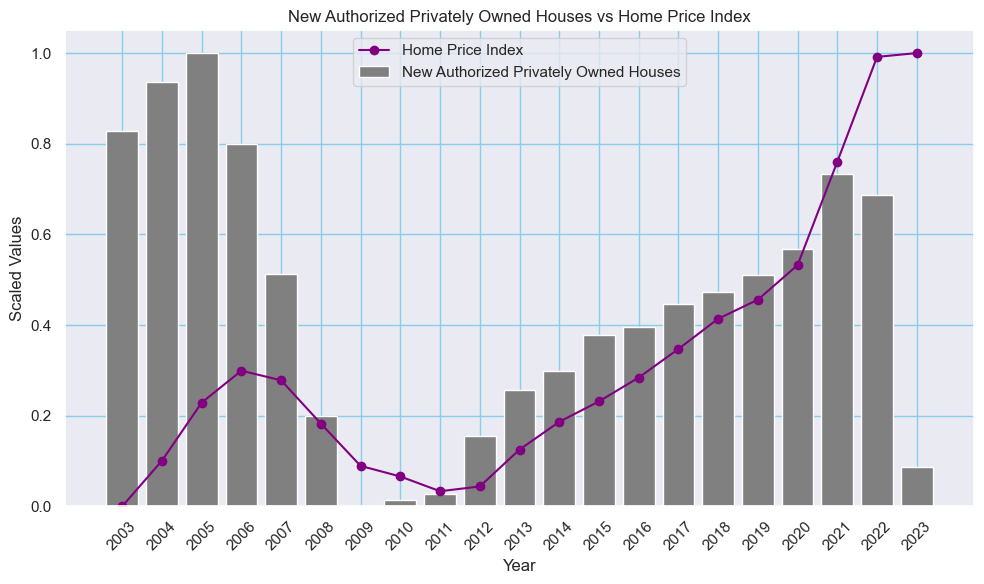

In [275]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['New Authorized Privately Owned Houses'], color = 'grey', label = 'New Authorized Privately Owned Houses')
plt.plot(grouped_data['Year'], grouped_data['Case-Shiller Home Price Index'], marker = 'o', color = 'purple', label = 'Home Price Index')
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('New Authorized Privately Owned Houses vs Home Price Index')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.grid(color = 'skyblue')
plt.show()

This showcases number of new privately-owned housing units that have been authorized or permitted for construction in a specific geographical area over a given period of time. An increase in the number of authorized housing units suggests a growing housing market, while a decrease may indicate a slowdown. 

## Model

In [276]:
df.head()

,Date,Average Sales Price of Houses Sold,Median Sales Price of Houses Sold,Housing Inventory Estimate(Vacant),Housing Inventory Estimate(Total),GDP,Unemployment Rate,Interest and Discount Rates,15 Year Fixed Mortgage Rate,30 Year Fixed Mortgage Rate,Consumer Sentiment,Monthly Supply of New Houses,Total Construction Spending,Population,New Authorized Privately Owned Houses,Case-Shiller Home Price Index,Year
0,2003-01-01,233100,186000,14908,120792,11174.13,5.9,2.25,5.20,5.84,80.0,4.2,421329,289609,1806,129.32,2003
1,2003-04-01,241000,191800,15244,121233,11312.77,6.1,2.17,4.87,5.51,89.3,3.8,429309,290253,1838,131.76,2003
2,2003-07-01,248100,191900,15614,121682,11566.67,6.1,2.00,5.36,6.03,89.3,3.6,458890,290974,1937,135.01,2003
3,2003-10-01,256000,198800,15654,122159,11772.23,5.8,2.00,5.25,5.92,92.0,4.0,491437,291669,1972,138.83,2003
4,2004-01-01,262900,212700,15895,122632,11923.45,5.7,2.00,4.90,5.60,98.0,3.7,506856,292237,1995,143.30,2004


### Splitting Data

In [277]:
X = df.drop(['Date','Year','Case-Shiller Home Price Index'], axis = 1)
y = df['Case-Shiller Home Price Index']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )

### Scaling data 

In [280]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear regression

In [285]:
LR_model = LinearRegression()

# Define the hyperparameter grid for GridSearchCV (Linear Regression has no hyperparameters)
param_grid = {}

# Create GridSearchCV object with MAE as the scoring metric
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search (none for Linear Regression)
best_params = grid_search.best_params_

# Use the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) on the test set
mae_LR = mean_absolute_error(y_test, y_pred)
r2_score_LR = metrics.r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_LR}")
print(f"Test MAE: {mae_LR}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {}
Test R2 Score: 0.994152392483535
Test MAE: 2.2353857979264045


## Decision Tree

In [286]:
DT_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DT_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
r2_score_DT = metrics.r2_score(y_test, y_pred)
mae_DT = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_DT}")
print(f"Test MAE: {mae_DT}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test R2 Score: 0.9721043898167109
Test MAE: 4.728264705882354


## KNN Algorithm

In [287]:
KNN_model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

grid_search = GridSearchCV(
    estimator=KNN_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_score_KNN = metrics.r2_score(y_test, y_pred)
mae_KNN = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_KNN}")
print(f"Test MAE: {mae_KNN}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test R2 Score: 0.9832284574451068
Test MAE: 3.6006931654967334


## Lasso Model

In [288]:
Lasso_model = Lasso()

param_grid = {'alpha': [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(
    estimator=Lasso_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_score_Lasso = metrics.r2_score(y_test, y_pred)
mae_Lasso = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_Lasso}")
print(f"Test MAE: {mae_Lasso}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'alpha': 0.1}
Test R2 Score: 0.9937131210891272
Test MAE: 2.3416568958198773


## SVR Model

In [289]:
SVR_model = SVR()

param_grid = {'C': [1, 10, 100], 'epsilon': [0.01, 0.1, 1.0]}

grid_search = GridSearchCV(
    estimator=SVR_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_score_SVR = metrics.r2_score(y_test, y_pred)
mae_SVR = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_SVR}")
print(f"Test MAE: {mae_SVR}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'C': 100, 'epsilon': 0.1}
Test R2 Score: 0.9917452498058115
Test MAE: 2.2789124801737093


## XG Boost Alogorithm

In [290]:
XG_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(
    estimator=XG_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_score_XG = metrics.r2_score(y_test, y_pred)
mae_XG = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_XG}")
print(f"Test MAE: {mae_XG}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Test R2 Score: 0.980000480930478
Test MAE: 3.6997710463579967


## Ridge Model

In [291]:
Ridge_model = Ridge()

param_grid = {'alpha': [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(
    estimator=Ridge_model, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_score_Ridge = metrics.r2_score(y_test, y_pred)
mae_Ridge = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R2 Score: {r2_score_Ridge}")
print(f"Test MAE: {mae_Ridge}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'alpha': 0.1}
Test R2 Score: 0.996024270214172
Test MAE: 1.86774115188333


## Summary of all models

In [292]:
Models = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'KNN Regressor', 'Ridge', 'Lasso', 'SVR', 'XG Boost'],
    'R2 Score' : [r2_score_LR, r2_score_DT, r2_score_KNN, r2_score_Ridge, r2_score_Lasso, r2_score_SVR, r2_score_XG],
    'MAE Score' : [mae_LR, mae_DT, mae_KNN, mae_Ridge, mae_Lasso, mae_SVR, mae_XG],
}

models_df = pd.DataFrame(Models)
models_df

,Model,R2 Score,MAE Score
0,Linear Regression,0.994152,2.235386
1,Decision Tree Regressor,0.972104,4.728265
2,KNN Regressor,0.983228,3.600693
3,Ridge,0.996024,1.867741
4,Lasso,0.993713,2.341657
5,SVR,0.991745,2.278912
6,XG Boost,0.980000,3.699771


Linear Regression, Ridge Regression, and Lasso Regression perform exceptionally well in explaining the variance and making accurate predictions.
Decision Tree Regressor, KNN Regressor, and SVR also perform well but may have slightly lower accuracy compared to linear models.
XG Boost, while respectable, has slightly lower accuracy compared to some of the other models.

We can see that the best model for this dataset in the Ridge model as it gives the least Mean Absolute Error as compared to all the other models. It also has a R2 Score of 99% implying very high goodness of fit and explains nearly all the variance in the dependent variable. This indicates that the models prediction are closer to the actual target variables. Ridge regression comes at the cost of interpretability but has high accuracy and predictive performance. Therefore, we could consider Ridge regression for this problem statement. 

Alternatively, we can also choose Linear regression as it has good interpretability and strong performance. Linear Regression is also providing a good MAE score of 2.23 which is the second best among all the other models.

### Finding important features

In [293]:
coefficients = best_model.coef_
feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

                                  Feature  Coefficient  Absolute_Coefficient
4                                     GDP    22.002027             22.002027
11            Total Construction Spending    20.812618             20.812618
3       Housing Inventory Estimate(Total)    19.060080             19.060080
12                             Population   -18.317370             18.317370
0      Average Sales Price of Houses Sold     9.575032              9.575032
1       Median Sales Price of Houses Sold    -4.343088              4.343088
10           Monthly Supply of New Houses     4.231659              4.231659
5                       Unemployment Rate     3.087204              3.087204
6             Interest and Discount Rates     2.606992              2.606992
13  New Authorized Privately Owned Houses     1.061509              1.061509
7             15 Year Fixed Mortgage Rate     1.014361              1.014361
2      Housing Inventory Estimate(Vacant)    -0.788801              0.788801

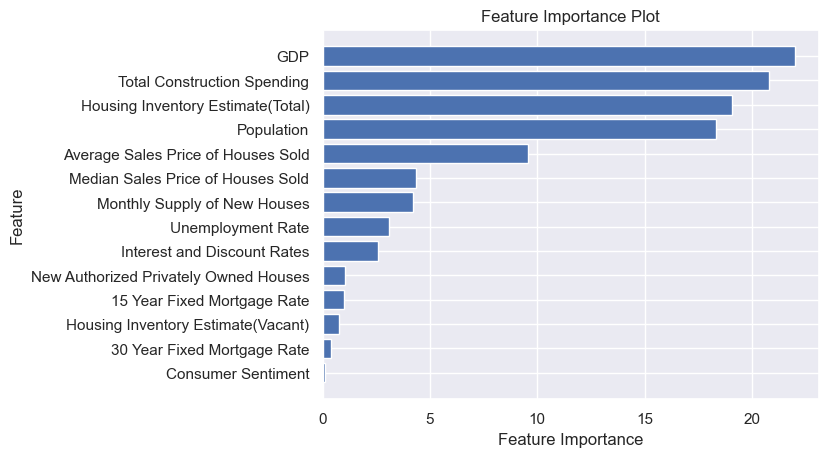

In [294]:
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=True)

plt.barh(y=feature_importance['Feature'], width=feature_importance['Absolute_Coefficient'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Features such as "GDP," "Total Construction Spending," and "Housing Inventory Estimate(Total)" have the highest positive coefficients. This suggests that increases in these variables are strongly associated with higher home prices. Specifically:

"GDP" has the highest positive coefficient, indicating that an increase in GDP is associated with a substantial increase in home prices.

"Total Construction Spending" also has a strong positive influence on home prices.

"Housing Inventory Estimate(Total)" has a positive impact, suggesting that a larger inventory of available housing is associated with higher home prices.

Feature such as "Consumer Sentiment", "Mortgage rates" and "Housing Inventory estimate(Vacant)" have week coefficients. This suggests that a change in these variables would not afffect home prices substantially. 



To conclude, GDP, Total Construction Spending, Total Housing Inventory estimate, Population and Average Prices of Houses sold can affect house prices substantially as compared to other factors. These insighs can be useful for policymakers, real estate investors and potential buyers to make informed decisions by understanding the pricing mechanism.